In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import PolynomialFeatures



This is notes to myself, a pre-university student who has not formally started studying econs and computer science yet so pls dont judge if its badly written. If you would like to point out some glaring error or discuss anything in general, my email is isaacyang2002@gmail.com :). So in H2 (my high school syllabus) we learnt that we UE and inflation are often in conflict. Empirically, we also see this occurring, as stated by my man Philips. Generally, the sacrifice ratio has been used pretty frequently by most policy-makers too, and some famous instances of UE and inflation in conflict include the Volcker disinflation period. Anyways, I would be (correctly, I hope) making use of some simple linear regression techniques to see if inflation alone is a strong predictor for unemployment. The data I used is obtained from the Singapore Ministry of Manpower, you can probably find them online just by searching "Singapore UE statistics" and what not. Anyways, have fun (or don't idk).

In [52]:
cpi = pd.read_csv("C:\\development\\random_data\\singapore_data\\inflation\\cpi.csv") 
cpi.head(20) 
#cool! so there's 3 different types of inflation here, I think to start off I will look at MAS core inflation only!


,year,level_1,value
0,1990,MAS Core Inflation Measure,62.094
1,1990,Services Inflation Measure,na
2,1990,Retail & Other Goods Inflation Measure,na
3,1990,Electricity & Gas Inflation Measure,na
4,1991,MAS Core Inflation Measure,64.359
5,1991,Services Inflation Measure,na
6,1991,Retail & Other Goods Inflation Measure,na
7,1991,Electricity & Gas Inflation Measure,na
8,1992,MAS Core Inflation Measure,65.398
9,1992,Services Inflation Measure,na


In [46]:
data = np.genfromtxt('C:\\development\\random_data\\singapore_data\\inflation\\cpi.csv', delimiter=',')


62.094

In [119]:
list = []
sum = 0
for i in data[9:]: #note i put [9:] because the UE data is from 1992 onwards, probably because Singapore is only like 50 years old
    if sum % 4 == 0:
        list.append(i[2])
    sum +=1
#I feel like this is the clumsiest method to get the core inflations but i just am unable to can. Anyways theres 29 values now
#hmm, 29 isn't a really large value to go by for linear regression innit but ok whatever

In [126]:
core = []
sum =0
for x in list[1:]:
    inf = (x - list[sum])/list[sum]*100
    core.append(inf)
    sum+=1
print(core)

[1.7798709440655702, 2.5299720561281176, 2.19500043958621, 1.796570314292269, 1.5409101793033426, 0.3953336754934885, 0.49740245385210485, 1.4875714914210205, 1.5538215611368578, -0.05069032215033242, 0.9395811923605555, 1.9886025571524968, 1.256239061385874, 1.716941513878923, 2.2027817987286804, 5.673994704107413, -0.02214400596723323, 1.5154517794901055, 2.1668982465004656, 2.5491738788355636, 1.7109099278809345, 1.9482968566471544, 0.49573498789729525, 0.9013841558332425, 1.4530974742789147, 1.6840136858220185, 1.0448032657680477, -0.15500000000000114]


In [127]:
np_core = np.array(core).reshape(-1, 1)
transformer = PolynomialFeatures(degree=2, include_bias=False) #highest being X^2
transformer.fit(np_core)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

In [128]:
#now onto UE!
UE = pd.read_csv("C:\\development\\random_data\\singapore_data\\unemployment\\UE_rate.csv")
UE.head()
#aha since the format of this data is like this, its much easier and I don't havae to use the np.genfromtxt thing that i copied 
#from stackexchange

,year,residential_status,unemployment_rate
0,1992,overall,1.8
1,1993,overall,1.7
2,1994,overall,1.7
3,1995,overall,1.8
4,1996,overall,1.7


In [132]:
UE_rate = np.array(UE["unemployment_rate"].values.tolist())
UE_rate = UE_rate[1:]
np.shape(UE_rate)

(28,)

In [133]:
model = LinearRegression()
model.fit(np_core, UE_rate)
r_sqr = model.score(np_core, UE_rate)
print(r_sqr) #well this sucks 

0.16331141272426608


In [134]:
pred = model.predict(np_core)
print(UE_rate)

[1.7 1.7 1.8 1.7 1.4 2.5 2.8 2.7 2.7 3.6 4.  3.4 3.1 2.7 2.1 2.2 3.  2.2
 2.  2.  1.9 2.  1.9 2.1 2.2 2.1 2.3 3. ]


In [135]:
pred

array([2.32775353, 2.15483253, 2.23205362, 2.32390382, 2.38284121,
       2.64693125, 2.62340131, 2.39513739, 2.37986475, 2.74975327,
       2.52146573, 2.27963458, 2.44846651, 2.34226066, 2.23025978,
       1.43004021, 2.74317248, 2.38871014, 2.23853203, 2.15040593,
       2.34365113, 2.28892626, 2.62378571, 2.5302713 , 2.4030847 ,
       2.34985152, 2.49720886, 2.77379981])

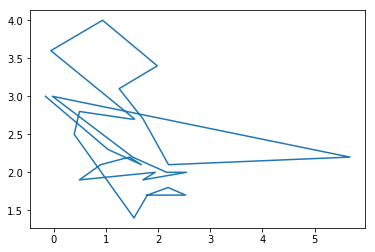

In [136]:
plt.plot(np_core, UE_rate)


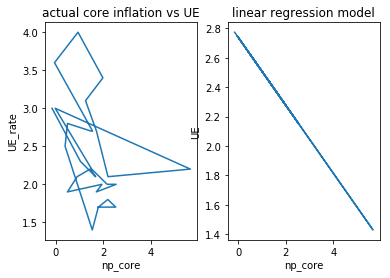

In [139]:

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(np_core, UE_rate)
plt.title("actual core inflation vs UE")
plt.xlabel('np_core')
plt.ylabel('UE_rate')

plt.subplot(1, 2, 2) # index 2
plt.plot(np_core, pred)
plt.title("linear regression model")
plt.xlabel('np_core')
plt.ylabel('UE')

plt.show()

# Conclusion:#
honestly it looks like linear regression model as a model sucks in prediction, as seen from both the R value and the graphs above but ig if you were to hold a knife to my throat and demand a trend in simplest terms, it looks like its correct to say that UE is inversely proportional to inflation. 
# Limitations#
I honestly think data is so limited, I think we could try to increase the data by looking at other countries with a longer history/combining countries. We should consider countries of the same type too (very open economy, less open economy, similar labor laws etc.). Also, we should consider unemployment as a lagging indicator (?), so maybe dial back the UE to the length of half a business cycle or so. 

# part 2#
I think what I'm going to do next is to find more data. I'm going to look at the U.S. only since I can't really find any other good datasets lmao. lmk if you guys find any. The dataset I found on FRED is 100 years, from 1947 and both the inflation and UE is given quarterly! how nice, so you have about 400ish entries if my math is right, which is substantially more than 29. Maybe we will see a clearer trend here! I'm still gonna pretend that the lagging indicator is not a thing first.

In [228]:
df = pd.read_csv("C:\\development\\random_data\\econs_data\\inflation\\US_quarterly.csv")
df.head(10) # I am in love with how convenient FRED made the data for comparison gosh.

,DATE,PCECTPI
0,1947-01-01,12.226
1,1947-04-01,12.324
2,1947-07-01,12.553
3,1947-10-01,12.866
4,1948-01-01,13.009
5,1948-04-01,13.143
6,1948-07-01,13.344
7,1948-10-01,13.302
8,1949-01-01,13.197
9,1949-04-01,13.116


In [229]:
CPI = np.array(df["PCECTPI"].values.tolist())
inflation = []
sum = 0
for i in CPI[1:]:
    inf = (i - CPI[sum])/CPI[sum] *100
    inflation.append(inf)
    sum+=1
inf = np.asarray(inflation).reshape(-1,1)[7:] #I only look at inflation rates from 1949 onwards cos thats the UE data start time
np.shape(inf) #now we gotta check the shape of the other one to make sure we took out the 1949-01-01 element
transformer = PolynomialFeatures(degree=2, include_bias=False) #highest being X^2
transformer.fit(inf)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

In [230]:
df = pd.read_csv("C:\\development\\random_data\\econs_data\\unemployment\\US_quarterly.csv")[0:292]
df.head() #wow 5% is really high innit
len(df)

292

In [231]:
UE = np.array(df["NROU"].values.tolist())[0:290]
len(UE) #great! now both are the same length and each element in their respective positions represent the same time period!

290

In [236]:
model = LinearRegression(inf,UE)
model = LinearRegression().fit(inf, UE)
model.score(inf,UE) #wow! much more decent than before!!! still sucks but its a big improvement

0.323721522485204

In [246]:
predictions = model.predict(inf) #in-sample predictions! lets not get too ambitious lmao

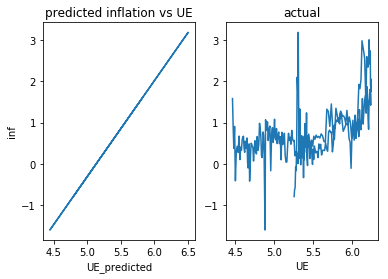

In [259]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(predictions, inf)
plt.title("predicted inflation vs UE")
plt.xlabel('UE_predicted')
plt.ylabel('inf')

plt.subplot(1, 2, 2) # index 2
plt.plot(UE, inf)
plt.title("actual")
plt.xlabel('UE')

plt.show()

# Conclusion#
As expected, the r value is higher but  the predicted UE is just completely opposite what was predicted by my econs teacher ms lio! If the code is right (a huge if), I'm guessing this is because of stagflation, although god knows why 100 years of data will be affected so heavily by 10 years of stagflation, maybe the US never bothered to rehire ppl after the 1970s. Anyways, for the third part I will implement time lag in intervals of 2 months, until my computer crashes. So what I will do is to pick the nth month of the inflation, and then match it with some (n+x)th month of UE.

In [269]:
print(inf)
print(UE)

[[-0.78935498]
 [-0.61377586]
 [-0.57944495]
 [-0.07668712]
 [-0.16116654]
 [ 0.47659313]
 [ 2.09624359]
 [ 1.77594605]
 [ 3.18068031]
 [ 0.7992008 ]
 [ 0.13450375]
 [ 1.32909155]
 [ 0.42559129]
 [-0.02084202]
 [ 0.65318602]
 [ 0.16568864]
 [ 0.37218278]
 [ 0.15106777]
 [ 0.53479602]
 [ 0.43647275]
 [ 0.50247844]
 [-0.135126  ]
 [-0.33150666]
 [-0.09503122]
 [ 0.31933687]
 [ 0.1015916 ]
 [ 0.39242219]
 [ 0.27631756]
 [ 0.40997379]
 [ 0.66934404]
 [ 0.97739362]
 [ 0.58602752]
 [ 0.89683163]
 [ 0.6358269 ]
 [ 0.81232674]
 [ 0.51800217]
 [ 1.23425372]
 [ 0.18225239]
 [ 0.07527759]
 [-0.03761048]
 [ 0.68351414]
 [ 0.40483308]
 [ 0.60790274]
 [ 0.54257352]
 [ 0.12877905]
 [ 0.5267026 ]
 [ 0.37163397]
 [ 0.4430956 ]
 [ 0.18733382]
 [-0.01206345]
 [ 0.35591482]
 [ 0.10819909]
 [ 0.43232857]
 [ 0.35872295]
 [ 0.26808054]
 [ 0.3030123 ]
 [ 0.29024997]
 [ 0.15356447]
 [ 0.4835761 ]
 [ 0.36974001]
 [ 0.47362882]
 [ 0.2153291 ]
 [ 0.33101045]
 [ 0.32991839]
 [ 0.3230645 ]
 [ 0.50603795]
 [ 0.37189

In [267]:
lag_inf = []
lag_UE = []
sum = 0
x = 2
for i in inf:
    if sum + x > len(UE) -1:
        break
    else:
        lag_inf.append(i)
        lag_UE.append(UE[sum+ x])
        sum+=1

In [276]:
lag_inf = np.array(lag_inf).reshape(-1,1)
lag_UE =np.array(lag_UE)

In [279]:
transformer = PolynomialFeatures(degree=2, include_bias=False) #highest being X^2 
transformer.fit(lag_inf)
new_inf = transformer.transform(lag_inf)

In [280]:
model = LinearRegression().fit(new_inf, lag_UE)

In [281]:
model.score(new_inf,lag_UE) #wowee its higher!!! whoohoo.

0.3433883852498367

In [298]:
np.shape(new_inf)

(290, 2)

In [282]:
x_value =[]
sum = 0
while sum <=20:
    x_value.append(sum)
    sum+=1


Now i repeat the above process, but I spam X months. and i draw a nice graph from the spamming to see if we can obtain the lag value. I am economist.

In [285]:
r_score = []
for x in x_value:
    lag_inf = []
    lag_UE = []
    sum = 0
    for i in inf:
        if sum + x > len(UE) -1:
            break
        else:
            lag_inf.append(i)
            lag_UE.append(UE[sum+ x])
            sum+=1
    lag_inf = np.array(lag_inf).reshape(-1,1)
    lag_UE =np.array(lag_UE)
    transformer = PolynomialFeatures(degree=2, include_bias=False) #highest being X^2 
    transformer.fit(lag_inf)
    new_inf = transformer.transform(lag_inf)
    model = LinearRegression().fit(new_inf, lag_UE)
    r = model.score(new_inf,lag_UE) 
    r_score.append(r)

4


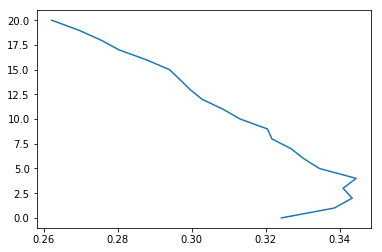

In [294]:
plt.plot(r_score, x_value) 
print(r_score.index(max(r_score)))

Wow! so it looks like a boomerang and 3 months is the optimal value to give the highest R score. Interesting! Next, I'm gonna try and add my own idea of accuracy metric! Basically if the predicted deviates too much from the actual I categorise it as it sucks. I figure it will be correlated to the R score!!

In [302]:
r_score = []
accuracy = []
for x in x_value:
    lag_inf = []
    lag_UE = []
    sum = 0
    for i in inf:
        if sum + x > len(UE) -1:
            break
        else:
            lag_inf.append(i)
            lag_UE.append(UE[sum+ x])
            sum+=1
    lag_inf = np.array(lag_inf).reshape(-1,1)
    lag_UE =np.array(lag_UE)
    transformer = PolynomialFeatures(degree=2, include_bias=False) #highest being X^2 
    transformer.fit(lag_inf)
    new_inf = transformer.transform(lag_inf)
    model = LinearRegression().fit(new_inf, lag_UE)
    r = model.score(new_inf,lag_UE) 
    r_score.append(r)
    transformer = PolynomialFeatures(degree=2, include_bias=False) #highest being X^2 
    transformer.fit(inf)
    test_inf = transformer.transform(inf)
    predict = model.predict(test_inf)
    total = 0
    correct = 0
    for i in predict: 
        if abs(i - UE[total]) <=0.1:
            correct +=1
        total +=1
    accuracy.append(correct/total *100)

In [312]:
print(accuracy)

[19.310344827586206, 20.0, 20.0, 20.0, 20.344827586206897, 20.0, 20.0, 20.0, 20.0, 20.344827586206897, 19.655172413793103, 19.655172413793103, 19.310344827586206, 19.655172413793103, 19.655172413793103, 20.0, 19.655172413793103, 19.655172413793103, 19.310344827586206, 19.310344827586206, 19.310344827586206]


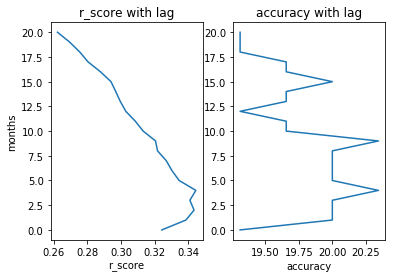

In [309]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(r_score, x_value)
plt.title("r_score with lag")
plt.xlabel('r_score')
plt.ylabel('months')

plt.subplot(1, 2, 2) # index 2
plt.plot(accuracy, x_value)
plt.title("accuracy with lag")
plt.xlabel('accuracy')

plt.show()

oh.

# Conclusion#
In this fun-filled, boredom-driven activity, I looked at Singapore and the U.S.'s data using linear regression and did some simple, and probably wrong, analysis. For SG, the r value is so bad, probably because of there being no data at all lmao. For the U.S., the r value is better but its still really low at like 0.3, would have liked it to be 0.7ish :(. Anyways, this probably means inflation isn't a really strong indicator for UE? or it could mean i coded wrongly (highly likely). Also, I looked at the possiblity of time lag, which kind of boosted the r score a bit, if the time lag = 3 months. Any higher, and woosh the r score goes down which is probably q intuitive as to why. Also, its quite cool to note that the highest accuracy values are at 3 months (expected since r score is highest there) AND 8 months! wow! what's going on there! idk lmao